# イメージを読み込む (os.listdir  vs  glob.glob)

https://stackoverflow.com/questions/13643558/should-glob-glob-be-preferred-over-os-listdir-or-the-other-way-around

In [9]:
#!pip install tensorflow==2.2.0

In [10]:
import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

## osを使用する場合

In [11]:
path = './training' 
flist = os.listdir(path)

In [12]:
!ls -a ./training

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [13]:
flist

['cat0.jpg',
 'cat1.jpg',
 'cat2.jpg',
 'cat3.jpg',
 'cat4.jpg',
 'dog0.jpg',
 'dog1.jpg',
 'dog2.jpg',
 'dog3.jpg',
 'dog4.jpg']

In [14]:
# 不可視ファイルの.DS_Storeファイルを除いて読み込む

'''
余談

.DS_Storeファイルとは？ 開けるの？

https://miloserdov.org/?p=3867

'''


flist_ignore = [name for name in os.listdir(path) if not name.startswith('.')]
flist_ignore

['cat0.jpg',
 'cat1.jpg',
 'cat2.jpg',
 'cat3.jpg',
 'cat4.jpg',
 'dog0.jpg',
 'dog1.jpg',
 'dog2.jpg',
 'dog3.jpg',
 'dog4.jpg']

## globを使用する場合

In [15]:
path = './training' 
img_list = glob.glob(path + '/*' + ".jpg")
img_list 

['./training\\cat0.jpg',
 './training\\cat1.jpg',
 './training\\cat2.jpg',
 './training\\cat3.jpg',
 './training\\cat4.jpg',
 './training\\dog0.jpg',
 './training\\dog1.jpg',
 './training\\dog2.jpg',
 './training\\dog3.jpg',
 './training\\dog4.jpg']

# イメージのロード、配列化、リサイズ、データセット作成

In [16]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
        
        dog_img_.close()
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        
        cat_img_.close()

In [17]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)


# イメージの出力

In [18]:
# 配列のまま出力

print('データ型:', cat_img_array[3].dtype)

cat_img_array[3]

データ型: float64


array([[[0.04313725, 0.06666667, 0.02352941],
        [0.04705882, 0.07058824, 0.02352941],
        [0.04705882, 0.07843137, 0.02352941],
        ...,
        [0.40392157, 0.36470588, 0.04313725],
        [0.32941176, 0.31372549, 0.00784314],
        [0.2627451 , 0.27058824, 0.00392157]],

       [[0.04313725, 0.06666667, 0.02352941],
        [0.04705882, 0.0745098 , 0.02352941],
        [0.05098039, 0.08235294, 0.02352941],
        ...,
        [0.41568627, 0.38039216, 0.05490196],
        [0.32941176, 0.31372549, 0.01176471],
        [0.2627451 , 0.26666667, 0.00392157]],

       [[0.04313725, 0.07058824, 0.02352941],
        [0.04705882, 0.07843137, 0.01960784],
        [0.05098039, 0.08627451, 0.02352941],
        ...,
        [0.44705882, 0.40392157, 0.07843137],
        [0.32941176, 0.31372549, 0.01176471],
        [0.25882353, 0.2627451 , 0.00784314]],

       ...,

       [[0.34901961, 0.29803922, 0.28627451],
        [0.4       , 0.3372549 , 0.3372549 ],
        [0.4745098 , 0

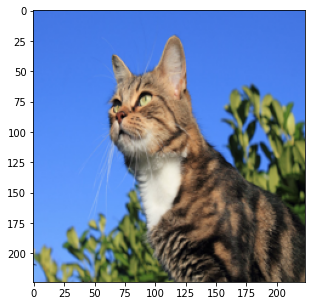

In [19]:
# 配列を画像として出力

plt.rcParams['figure.figsize'] = (5.0, 5.0)

plt.imshow(cat_img_array[2])

plt.show()

In [20]:
'''

画像の中心を切り出し

https://note.nkmk.me/python-pillow-image-crop-trimming/

'''


def crop_center(pil_img, crop_width, crop_height):
    
    img_width, img_height = pil_img.size
    
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))


<class 'PIL.Image.Image'>


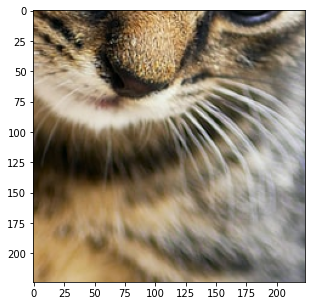

In [21]:
img = Image.open(img_list[4])

img_new = crop_center(img, 224, 224)

print(type(img_new))

plt.imshow(img_new)

plt.show()

img.close()

## Kerasでも読み込んでみよう

In [22]:
#!pip install keras

In [23]:
from keras.preprocessing.image import load_img, img_to_array

In [24]:
img_keras = load_img(img_list[4], grayscale=False, color_mode='rgb', target_size=(224,224))

img_keras_array = img_to_array(img_keras) / 255.

print('データ型:', img_keras_array.dtype)

img_keras_array

データ型: float32


array([[[0.16078432, 0.13333334, 0.10196079],
        [0.14117648, 0.11372549, 0.08235294],
        [0.10980392, 0.09411765, 0.05882353],
        ...,
        [0.17254902, 0.2784314 , 0.10980392],
        [0.16470589, 0.29411766, 0.10980392],
        [0.15686275, 0.30588236, 0.10588235]],

       [[0.13333334, 0.10980392, 0.0627451 ],
        [0.1254902 , 0.10196079, 0.05490196],
        [0.10196079, 0.08627451, 0.03921569],
        ...,
        [0.17254902, 0.2784314 , 0.10980392],
        [0.15686275, 0.29803923, 0.10980392],
        [0.15294118, 0.30980393, 0.10588235]],

       [[0.12941177, 0.10588235, 0.05882353],
        [0.12156863, 0.09803922, 0.05098039],
        [0.09803922, 0.08235294, 0.03529412],
        ...,
        [0.16862746, 0.2901961 , 0.11764706],
        [0.15294118, 0.3019608 , 0.10980392],
        [0.14509805, 0.3137255 , 0.10588235]],

       ...,

       [[0.73333335, 0.7411765 , 0.65882355],
        [0.44313726, 0.4627451 , 0.43529412],
        [0.36862746, 0

<class 'PIL.Image.Image'>


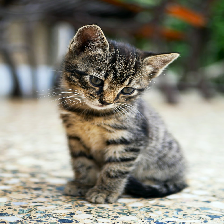

In [25]:
print(type(img_keras))

img_keras

## Resizeについて

In [26]:
import cv2

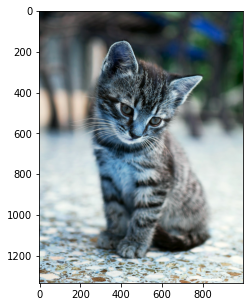

In [27]:
# 元のサイズの画像

img = cv2.imread(img_list[4])

plt.imshow(img)

plt.show()

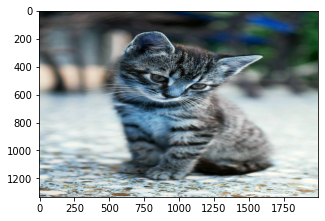

In [28]:
#plt.rcParams['figure.figsize'] = (10.0, 10.0)

img = cv2.imread(img_list[4])

# 横幅2倍にしてみる
img = cv2.resize(img, None, fx = 2, fy = 1)

plt.imshow(img)

plt.show()

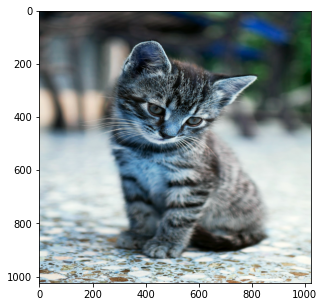

In [29]:
img = cv2.imread(img_list[4])


# cv2でリサイズ　ピクセル補間の方法も指定できる
'''
cv2.INTER_NEAREST :最近傍補間
cv2.INTER_LINEAR :双線形補間（拡大むき）
cv2.INTER_AREA :平均画素法。モアレを軽減させる内挿（縮小むき）
cv2.INTER_CUBIC:4×4 の近傍領域を利用するバイキュービック補間（拡大むき）
cv2.INTER_LANCZOS4:8×8 の近傍領域を利用する Lanczos法の補間

下に行くほど計算時間がかかる



https://www.tech-tech.xyz/opecv_resize.html

http://tessy.org/wiki/index.php?%B2%E8%C1%FC%A4%CE%A5%EA%A5%B5%A5%A4%A5%BA

https://github.com/ArunJayan/OpenCV-Python/search?q=cv2.resize&unscoped_q=cv2.resize

http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/

'''

img = cv2.resize(img, (1024, 1024), cv2.INTER_NEAREST)

plt.imshow(img)

plt.show()

# openCVの色形式

## グレースケール 

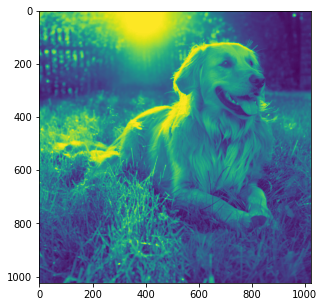

In [30]:
# 第二引数を0にするとグレースケールで読み込める
plt.rcParams['figure.figsize'] = (5.0, 5.0)

img = cv2.imread(img_list[5], 0)

# cv2でリサイズ
img = cv2.resize(img, (1024, 1024), cv2.INTER_NEAREST)

plt.imshow(img)

plt.show()

In [31]:
img_array_1 = img_to_array(img) / 255.
img_array_1.shape

(1024, 1024, 1)

## BGRとRGB

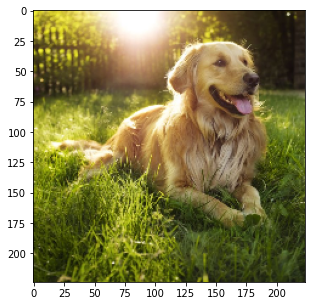

In [32]:
'''

なぜ彼らはOpenCVでBGRカラースペースを選択したのですか？

OpenCVの初期の開発者がBGRカラー形式を選択した理由は、
当時のBGRカラー形式がカメラメーカーとソフトウェアプロバイダーの間で人気があったためです。
たとえば、Windowsでは、COLORREFを使用して色の値を指定する場合、BGR形式0x00bbggrrを使用します。

BGRは歴史的な理由から選択されたものであり、今ではBGRと共存しなければなりません。
言い換えれば、BGRはOpenCVの馬のお尻です。

https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/

'''


img = cv2.imread(img_list[5])
img = cv2.resize(img, (224, 224))

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# RGBチャネル

plt.imshow(img_rgb)

plt.show()

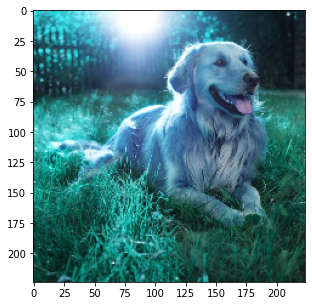

In [33]:
# BGRチャネル

plt.imshow(img)

plt.show()